<a href="https://colab.research.google.com/github/vmadalasa/EVA4S5/blob/master/EVA4S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [12]:
torch.cuda.get_device_name(0)

'Tesla P4'

In [13]:
import data
train_loader, test_loader = data.load()

CUDA Available? True


In [14]:
!pip install tqdm
import test as t
import train

In [0]:
import model as m

In [16]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
from torch.optim.lr_scheduler import StepLR

epochs = 25
tasks = {'NoL1_NoL2 with BN':[0,0,False],
         'WithL1_NoL2 with BN':[1e-5,0,False],
         'NoL1_WithL2 with BN':[0,1e-5,False],
         'WithL1_WithL2 with BN':[1e-5,1e-5,False],
         'NoL1_NoL2 with GhostBN':[0,0,True],
         'WithL1_NoL2 with GhostBN':[1e-5,0,True],
         'NoL1_WithL2 with GhostBN':[0,1e-5,True],
         'WithL1_WithL2 with GhostBN':[1e-5,1e-5,True]}
for key,(lam1, lam2, gbn) in tasks.items():
  
  print('-----------------------------------------------------------------------------------------------------')
  print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx ', key, ' xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
  print('-----------------------------------------------------------------------------------------------------')
  print('Task being Performed: ', key)
  print('L1 Lambda Value: ', lam1)
  print('L2 Lambda Value: ', lam2)
  if gbn:
    print('GhostBatchNorm')
  else:
    print('BatchNorm')
  
  model = m.Net(gbn).to(device)
  optimizer = train.optimizer(model, lam2)
  scheduler = StepLR(optimizer, step_size= 7, gamma= 0.1)

  for epoch in range(epochs):
    print('EPOCH: ', epoch+1)
    train.train(model, device, train_loader, optimizer, epoch, lam= lam1)
    scheduler.step()
    t.test(model, device, test_loader, key)

  0%|          | 0/938 [00:00<?, ?it/s]

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_NoL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_NoL2 with BN
L1 Lambda Value:  0
L2 Lambda Value:  0
BatchNorm
EPOCH:  1


Loss=0.008079871535301208 Batch_id=937 Accuracy=93.15: 100%|██████████| 938/938 [00:16<00:00, 57.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0683, Accuracy: 9796/10000 (97.96%)

EPOCH:  2


Loss=0.020079344511032104 Batch_id=937 Accuracy=98.41: 100%|██████████| 938/938 [00:16<00:00, 56.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0432, Accuracy: 9857/10000 (98.57%)

EPOCH:  3


Loss=0.02220144122838974 Batch_id=937 Accuracy=98.75: 100%|██████████| 938/938 [00:16<00:00, 57.30it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9918/10000 (99.18%)

EPOCH:  4


Loss=0.033457472920417786 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:16<00:00, 56.68it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9912/10000 (99.12%)

EPOCH:  5


Loss=0.01810191571712494 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:16<00:00, 57.79it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9937/10000 (99.37%)

EPOCH:  6


Loss=0.16423851251602173 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:16<00:00, 57.35it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9930/10000 (99.30%)

EPOCH:  7


Loss=0.002805948257446289 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:16<00:00, 57.72it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9922/10000 (99.22%)

EPOCH:  8


Loss=0.0034405887126922607 Batch_id=937 Accuracy=99.48: 100%|██████████| 938/938 [00:16<00:00, 57.61it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 9951/10000 (99.51%)

EPOCH:  9


Loss=0.03708556294441223 Batch_id=937 Accuracy=99.54: 100%|██████████| 938/938 [00:16<00:00, 57.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9948/10000 (99.48%)

EPOCH:  10


Loss=0.02219446748495102 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:16<00:00, 58.06it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 9947/10000 (99.47%)

EPOCH:  11


Loss=0.0004812180995941162 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:16<00:00, 57.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 9942/10000 (99.42%)

EPOCH:  12


Loss=0.020635396242141724 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:16<00:00, 57.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 9946/10000 (99.46%)

EPOCH:  13


Loss=0.054225265979766846 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:16<00:00, 57.54it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 9944/10000 (99.44%)

EPOCH:  14


Loss=0.0008931010961532593 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:16<00:00, 57.67it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 9943/10000 (99.43%)

EPOCH:  15


Loss=0.003203079104423523 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:16<00:00, 57.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 9944/10000 (99.44%)

EPOCH:  16


Loss=0.1007726639509201 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:16<00:00, 58.50it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 9945/10000 (99.45%)

EPOCH:  17


Loss=0.005725592374801636 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:16<00:00, 57.45it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 9947/10000 (99.47%)

EPOCH:  18


Loss=0.060018278658390045 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:16<00:00, 57.68it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 9947/10000 (99.47%)

EPOCH:  19


Loss=0.0921257883310318 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:16<00:00, 58.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 9947/10000 (99.47%)

EPOCH:  20


Loss=0.17876677215099335 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:16<00:00, 57.83it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 9946/10000 (99.46%)

EPOCH:  21


Loss=0.0026972591876983643 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:16<00:00, 57.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 9944/10000 (99.44%)

EPOCH:  22


Loss=0.0036423951387405396 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:16<00:00, 57.52it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9944/10000 (99.44%)

EPOCH:  23


Loss=0.000903010368347168 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:16<00:00, 58.54it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 9947/10000 (99.47%)

EPOCH:  24


Loss=0.010024115443229675 Batch_id=937 Accuracy=99.70: 100%|██████████| 938/938 [00:16<00:00, 57.66it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0153, Accuracy: 9947/10000 (99.47%)

EPOCH:  25


Loss=0.005936324596405029 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:16<00:00, 57.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0150, Accuracy: 9948/10000 (99.48%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_NoL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_NoL2 with BN
L1 Lambda Value:  1e-05
L2 Lambda Value:  0
BatchNorm
EPOCH:  1


Loss=0.28223589062690735 Batch_id=937 Accuracy=92.99: 100%|██████████| 938/938 [00:18<00:00, 50.73it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0642, Accuracy: 9833/10000 (98.33%)

EPOCH:  2


Loss=0.26289471983909607 Batch_id=937 Accuracy=98.45: 100%|██████████| 938/938 [00:18<00:00, 50.66it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0498, Accuracy: 9837/10000 (98.37%)

EPOCH:  3


Loss=0.012691902928054333 Batch_id=937 Accuracy=98.76: 100%|██████████| 938/938 [00:18<00:00, 51.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0316, Accuracy: 9904/10000 (99.04%)

EPOCH:  4


Loss=0.038356710225343704 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:18<00:00, 50.86it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9910/10000 (99.10%)

EPOCH:  5


Loss=0.06309502571821213 Batch_id=937 Accuracy=99.10: 100%|██████████| 938/938 [00:18<00:00, 50.99it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9918/10000 (99.18%)

EPOCH:  6


Loss=0.01537678949534893 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:18<00:00, 51.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 9920/10000 (99.20%)

EPOCH:  7


Loss=0.009451627731323242 Batch_id=937 Accuracy=99.26: 100%|██████████| 938/938 [00:18<00:00, 51.26it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 9921/10000 (99.21%)

EPOCH:  8


Loss=0.05012223497033119 Batch_id=937 Accuracy=99.57: 100%|██████████| 938/938 [00:18<00:00, 50.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9937/10000 (99.37%)

EPOCH:  9


Loss=0.027609560638666153 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:18<00:00, 50.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9942/10000 (99.42%)

EPOCH:  10


Loss=0.010831695981323719 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:18<00:00, 51.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9941/10000 (99.41%)

EPOCH:  11


Loss=0.008816288784146309 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:18<00:00, 51.40it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9939/10000 (99.39%)

EPOCH:  12


Loss=0.021976400166749954 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:18<00:00, 50.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9939/10000 (99.39%)

EPOCH:  13


Loss=0.011231843382120132 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:18<00:00, 50.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9944/10000 (99.44%)

EPOCH:  14


Loss=0.008621802553534508 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:18<00:00, 50.55it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9938/10000 (99.38%)

EPOCH:  15


Loss=0.009342251345515251 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:18<00:00, 50.98it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9944/10000 (99.44%)

EPOCH:  16


Loss=0.009915584698319435 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:18<00:00, 50.82it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9944/10000 (99.44%)

EPOCH:  17


Loss=0.012977909296751022 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:18<00:00, 50.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

EPOCH:  18


Loss=0.008871397003531456 Batch_id=937 Accuracy=99.72: 100%|██████████| 938/938 [00:18<00:00, 51.45it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9945/10000 (99.45%)

EPOCH:  19


Loss=0.009732620790600777 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:18<00:00, 50.67it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)

EPOCH:  20


Loss=0.028480948880314827 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:18<00:00, 50.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9943/10000 (99.43%)

EPOCH:  21


Loss=0.008403867483139038 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:18<00:00, 50.59it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9944/10000 (99.44%)

EPOCH:  22


Loss=0.046689532697200775 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:18<00:00, 50.65it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9945/10000 (99.45%)

EPOCH:  23


Loss=0.008465047925710678 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:18<00:00, 50.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9942/10000 (99.42%)

EPOCH:  24


Loss=0.01818501204252243 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:18<00:00, 50.32it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9946/10000 (99.46%)

EPOCH:  25


Loss=0.014254867099225521 Batch_id=937 Accuracy=99.69: 100%|██████████| 938/938 [00:18<00:00, 50.41it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9943/10000 (99.43%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_WithL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_WithL2 with BN
L1 Lambda Value:  0
L2 Lambda Value:  1e-05
BatchNorm
EPOCH:  1


Loss=0.04043404757976532 Batch_id=937 Accuracy=93.47: 100%|██████████| 938/938 [00:16<00:00, 55.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0649, Accuracy: 9812/10000 (98.12%)

EPOCH:  2


Loss=0.043969087302684784 Batch_id=937 Accuracy=98.37: 100%|██████████| 938/938 [00:16<00:00, 56.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0658, Accuracy: 9795/10000 (97.95%)

EPOCH:  3


Loss=0.01422417163848877 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [00:16<00:00, 56.06it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0289, Accuracy: 9904/10000 (99.04%)

EPOCH:  4


Loss=0.06702497601509094 Batch_id=937 Accuracy=98.93: 100%|██████████| 938/938 [00:16<00:00, 55.21it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0315, Accuracy: 9897/10000 (98.97%)

EPOCH:  5


Loss=0.004108592867851257 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:16<00:00, 56.07it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0256, Accuracy: 9919/10000 (99.19%)

EPOCH:  6


Loss=0.01649545133113861 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [00:16<00:00, 56.68it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 9909/10000 (99.09%)

EPOCH:  7


Loss=0.01870150864124298 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:16<00:00, 55.28it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9918/10000 (99.18%)

EPOCH:  8


Loss=0.00202198326587677 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:16<00:00, 55.59it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9953/10000 (99.53%)

EPOCH:  9


Loss=0.0036321431398391724 Batch_id=937 Accuracy=99.51: 100%|██████████| 938/938 [00:16<00:00, 56.66it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9947/10000 (99.47%)

EPOCH:  10


Loss=0.00447787344455719 Batch_id=937 Accuracy=99.52: 100%|██████████| 938/938 [00:16<00:00, 55.73it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9954/10000 (99.54%)

EPOCH:  11


Loss=0.16638974845409393 Batch_id=937 Accuracy=99.51: 100%|██████████| 938/938 [00:16<00:00, 55.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9947/10000 (99.47%)

EPOCH:  12


Loss=0.018039748072624207 Batch_id=937 Accuracy=99.52: 100%|██████████| 938/938 [00:16<00:00, 55.99it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9950/10000 (99.50%)

EPOCH:  13


Loss=0.0005231201648712158 Batch_id=937 Accuracy=99.54: 100%|██████████| 938/938 [00:16<00:00, 55.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9949/10000 (99.49%)

EPOCH:  14


Loss=0.019289091229438782 Batch_id=937 Accuracy=99.56: 100%|██████████| 938/938 [00:16<00:00, 56.37it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 9954/10000 (99.54%)

EPOCH:  15


Loss=0.003958508372306824 Batch_id=937 Accuracy=99.57: 100%|██████████| 938/938 [00:16<00:00, 56.27it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9955/10000 (99.55%)

EPOCH:  16


Loss=0.00407843291759491 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:16<00:00, 56.74it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 9951/10000 (99.51%)

EPOCH:  17


Loss=0.005464181303977966 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:16<00:00, 55.82it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9953/10000 (99.53%)

EPOCH:  18


Loss=0.027794167399406433 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:16<00:00, 55.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 9954/10000 (99.54%)

EPOCH:  19


Loss=0.08997122943401337 Batch_id=937 Accuracy=99.60: 100%|██████████| 938/938 [00:16<00:00, 56.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9953/10000 (99.53%)

EPOCH:  20


Loss=0.026707254350185394 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:17<00:00, 55.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 9956/10000 (99.56%)

EPOCH:  21


Loss=0.10606466233730316 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:16<00:00, 56.00it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9949/10000 (99.49%)

EPOCH:  22


Loss=0.0023175328969955444 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:16<00:00, 55.74it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9951/10000 (99.51%)

EPOCH:  23


Loss=0.005738690495491028 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:16<00:00, 56.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9955/10000 (99.55%)

EPOCH:  24


Loss=0.10380735248327255 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:16<00:00, 56.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 9952/10000 (99.52%)

EPOCH:  25


Loss=0.03390023112297058 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:16<00:00, 55.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 9955/10000 (99.55%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_WithL2 with BN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_WithL2 with BN
L1 Lambda Value:  1e-05
L2 Lambda Value:  1e-05
BatchNorm
EPOCH:  1


Loss=0.025037458166480064 Batch_id=937 Accuracy=93.03: 100%|██████████| 938/938 [00:18<00:00, 49.43it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0501, Accuracy: 9856/10000 (98.56%)

EPOCH:  2


Loss=0.03552520275115967 Batch_id=937 Accuracy=98.39: 100%|██████████| 938/938 [00:19<00:00, 48.54it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0483, Accuracy: 9862/10000 (98.62%)

EPOCH:  3


Loss=0.09047302603721619 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [00:18<00:00, 49.44it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9897/10000 (98.97%)

EPOCH:  4


Loss=0.02090134471654892 Batch_id=937 Accuracy=98.80: 100%|██████████| 938/938 [00:18<00:00, 49.37it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9913/10000 (99.13%)

EPOCH:  5


Loss=0.017474746331572533 Batch_id=937 Accuracy=99.03: 100%|██████████| 938/938 [00:18<00:00, 49.64it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9913/10000 (99.13%)

EPOCH:  6


Loss=0.10091285407543182 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:18<00:00, 49.83it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9911/10000 (99.11%)

EPOCH:  7


Loss=0.031237944960594177 Batch_id=937 Accuracy=99.17: 100%|██████████| 938/938 [00:18<00:00, 49.81it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9924/10000 (99.24%)

EPOCH:  8


Loss=0.010193867608904839 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:19<00:00, 49.33it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9943/10000 (99.43%)

EPOCH:  9


Loss=0.02248934842646122 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:18<00:00, 49.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9948/10000 (99.48%)

EPOCH:  10


Loss=0.00893539097160101 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:18<00:00, 49.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9941/10000 (99.41%)

EPOCH:  11


Loss=0.00871369056403637 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:18<00:00, 49.52it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9948/10000 (99.48%)

EPOCH:  12


Loss=0.010228407569229603 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:19<00:00, 48.82it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9942/10000 (99.42%)

EPOCH:  13


Loss=0.010212819091975689 Batch_id=937 Accuracy=99.59: 100%|██████████| 938/938 [00:19<00:00, 48.98it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9939/10000 (99.39%)

EPOCH:  14


Loss=0.014990199357271194 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:18<00:00, 49.91it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9941/10000 (99.41%)

EPOCH:  15


Loss=0.014808256179094315 Batch_id=937 Accuracy=99.61: 100%|██████████| 938/938 [00:19<00:00, 49.27it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9945/10000 (99.45%)

EPOCH:  16


Loss=0.010613372549414635 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:19<00:00, 49.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9948/10000 (99.48%)

EPOCH:  17


Loss=0.010033508762717247 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:19<00:00, 48.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9945/10000 (99.45%)

EPOCH:  18


Loss=0.011941088363528252 Batch_id=937 Accuracy=99.62: 100%|██████████| 938/938 [00:19<00:00, 48.96it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9942/10000 (99.42%)

EPOCH:  19


Loss=0.01351306401193142 Batch_id=937 Accuracy=99.65: 100%|██████████| 938/938 [00:18<00:00, 49.37it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9944/10000 (99.44%)

EPOCH:  20


Loss=0.023266039788722992 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:19<00:00, 48.82it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9943/10000 (99.43%)

EPOCH:  21


Loss=0.02836824767291546 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:19<00:00, 49.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9943/10000 (99.43%)

EPOCH:  22


Loss=0.10769156366586685 Batch_id=937 Accuracy=99.66: 100%|██████████| 938/938 [00:18<00:00, 49.67it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9945/10000 (99.45%)

EPOCH:  23


Loss=0.016932591795921326 Batch_id=937 Accuracy=99.68: 100%|██████████| 938/938 [00:19<00:00, 49.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9945/10000 (99.45%)

EPOCH:  24


Loss=0.038813214749097824 Batch_id=937 Accuracy=99.63: 100%|██████████| 938/938 [00:19<00:00, 49.00it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

EPOCH:  25


Loss=0.044009361416101456 Batch_id=937 Accuracy=99.64: 100%|██████████| 938/938 [00:19<00:00, 48.92it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9942/10000 (99.42%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_NoL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_NoL2 with GhostBN
L1 Lambda Value:  0
L2 Lambda Value:  0
GhostBatchNorm
EPOCH:  1


Loss=0.053251639008522034 Batch_id=937 Accuracy=91.45: 100%|██████████| 938/938 [00:17<00:00, 53.98it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0460, Accuracy: 9874/10000 (98.74%)

EPOCH:  2


Loss=0.0915239155292511 Batch_id=937 Accuracy=97.72: 100%|██████████| 938/938 [00:17<00:00, 53.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0376, Accuracy: 9878/10000 (98.78%)

EPOCH:  3


Loss=0.0349276065826416 Batch_id=937 Accuracy=98.27: 100%|██████████| 938/938 [00:17<00:00, 54.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0429, Accuracy: 9868/10000 (98.68%)

EPOCH:  4


Loss=0.045021891593933105 Batch_id=937 Accuracy=98.51: 100%|██████████| 938/938 [00:17<00:00, 54.55it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9899/10000 (98.99%)

EPOCH:  5


Loss=0.03745795786380768 Batch_id=937 Accuracy=98.75: 100%|██████████| 938/938 [00:17<00:00, 54.35it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0290, Accuracy: 9914/10000 (99.14%)

EPOCH:  6


Loss=0.24202093482017517 Batch_id=937 Accuracy=98.86: 100%|██████████| 938/938 [00:17<00:00, 54.74it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9910/10000 (99.10%)

EPOCH:  7


Loss=0.03816187381744385 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:17<00:00, 53.88it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9924/10000 (99.24%)

EPOCH:  8


Loss=0.007346540689468384 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:17<00:00, 53.99it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9934/10000 (99.34%)

EPOCH:  9


Loss=0.09819291532039642 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:17<00:00, 53.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9938/10000 (99.38%)

EPOCH:  10


Loss=0.014900237321853638 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:17<00:00, 54.10it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9937/10000 (99.37%)

EPOCH:  11


Loss=0.03427805006504059 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:17<00:00, 53.88it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9938/10000 (99.38%)

EPOCH:  12


Loss=0.015595957636833191 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:17<00:00, 54.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Accuracy: 9942/10000 (99.42%)

EPOCH:  13


Loss=0.009240880608558655 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:17<00:00, 53.64it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9937/10000 (99.37%)

EPOCH:  14


Loss=0.03583730757236481 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:17<00:00, 54.32it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9939/10000 (99.39%)

EPOCH:  15


Loss=0.15536081790924072 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:17<00:00, 53.55it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9932/10000 (99.32%)

EPOCH:  16


Loss=0.09086636453866959 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:17<00:00, 54.05it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9937/10000 (99.37%)

EPOCH:  17


Loss=0.0395466685295105 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:17<00:00, 53.43it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9934/10000 (99.34%)

EPOCH:  18


Loss=0.0072522759437561035 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:17<00:00, 53.88it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9941/10000 (99.41%)

EPOCH:  19


Loss=0.062159568071365356 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:17<00:00, 53.70it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9935/10000 (99.35%)

EPOCH:  20


Loss=0.013808906078338623 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:17<00:00, 54.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9939/10000 (99.39%)

EPOCH:  21


Loss=0.038460761308670044 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:17<00:00, 54.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9937/10000 (99.37%)

EPOCH:  22


Loss=0.03906475007534027 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:17<00:00, 53.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9936/10000 (99.36%)

EPOCH:  23


Loss=0.007303357124328613 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:17<00:00, 53.20it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9932/10000 (99.32%)

EPOCH:  24


Loss=0.00657278299331665 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:17<00:00, 54.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9941/10000 (99.41%)

EPOCH:  25


Loss=0.013074666261672974 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:17<00:00, 54.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9936/10000 (99.36%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_NoL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_NoL2 with GhostBN
L1 Lambda Value:  1e-05
L2 Lambda Value:  0
GhostBatchNorm
EPOCH:  1


Loss=0.14225120842456818 Batch_id=937 Accuracy=91.66: 100%|██████████| 938/938 [00:19<00:00, 48.31it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0535, Accuracy: 9853/10000 (98.53%)

EPOCH:  2


Loss=0.02437726780772209 Batch_id=937 Accuracy=97.99: 100%|██████████| 938/938 [00:19<00:00, 48.27it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0306, Accuracy: 9918/10000 (99.18%)

EPOCH:  3


Loss=0.19663052260875702 Batch_id=937 Accuracy=98.38: 100%|██████████| 938/938 [00:19<00:00, 48.09it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9916/10000 (99.16%)

EPOCH:  4


Loss=0.2989211082458496 Batch_id=937 Accuracy=98.52: 100%|██████████| 938/938 [00:19<00:00, 48.28it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9921/10000 (99.21%)

EPOCH:  5


Loss=0.06789959222078323 Batch_id=937 Accuracy=98.74: 100%|██████████| 938/938 [00:19<00:00, 48.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9909/10000 (99.09%)

EPOCH:  6


Loss=0.028704283758997917 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:19<00:00, 47.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9933/10000 (99.33%)

EPOCH:  7


Loss=0.03793364390730858 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:19<00:00, 47.72it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9935/10000 (99.35%)

EPOCH:  8


Loss=0.05867838114500046 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:19<00:00, 47.82it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9944/10000 (99.44%)

EPOCH:  9


Loss=0.017025038599967957 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:19<00:00, 48.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9944/10000 (99.44%)

EPOCH:  10


Loss=0.023571165278553963 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:19<00:00, 47.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 9947/10000 (99.47%)

EPOCH:  11


Loss=0.15393413603305817 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:19<00:00, 47.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 9948/10000 (99.48%)

EPOCH:  12


Loss=0.01240558922290802 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:19<00:00, 48.05it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9945/10000 (99.45%)

EPOCH:  13


Loss=0.03043479472398758 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:19<00:00, 47.07it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 9942/10000 (99.42%)

EPOCH:  14


Loss=0.01565433293581009 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:19<00:00, 47.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 9946/10000 (99.46%)

EPOCH:  15


Loss=0.03100956231355667 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:19<00:00, 47.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9946/10000 (99.46%)

EPOCH:  16


Loss=0.022264037281274796 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:19<00:00, 47.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 9947/10000 (99.47%)

EPOCH:  17


Loss=0.05521411821246147 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:19<00:00, 47.20it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 9948/10000 (99.48%)

EPOCH:  18


Loss=0.027517031878232956 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:19<00:00, 47.86it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9947/10000 (99.47%)

EPOCH:  19


Loss=0.05625881999731064 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:19<00:00, 47.36it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 9945/10000 (99.45%)

EPOCH:  20


Loss=0.029391806572675705 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:19<00:00, 47.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9948/10000 (99.48%)

EPOCH:  21


Loss=0.043040938675403595 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:20<00:00, 46.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 9949/10000 (99.49%)

EPOCH:  22


Loss=0.03371930867433548 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:19<00:00, 47.29it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9943/10000 (99.43%)

EPOCH:  23


Loss=0.01438137236982584 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:19<00:00, 47.48it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 9946/10000 (99.46%)

EPOCH:  24


Loss=0.009665417484939098 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:19<00:00, 47.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 9947/10000 (99.47%)

EPOCH:  25


Loss=0.010630281642079353 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:20<00:00, 46.52it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9947/10000 (99.47%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  NoL1_WithL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  NoL1_WithL2 with GhostBN
L1 Lambda Value:  0
L2 Lambda Value:  1e-05
GhostBatchNorm
EPOCH:  1


Loss=0.19070754945278168 Batch_id=937 Accuracy=91.13: 100%|██████████| 938/938 [00:18<00:00, 50.83it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0536, Accuracy: 9846/10000 (98.46%)

EPOCH:  2


Loss=0.21377873420715332 Batch_id=937 Accuracy=97.85: 100%|██████████| 938/938 [00:18<00:00, 50.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0422, Accuracy: 9870/10000 (98.70%)

EPOCH:  3


Loss=0.1506984680891037 Batch_id=937 Accuracy=98.25: 100%|██████████| 938/938 [00:18<00:00, 50.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9909/10000 (99.09%)

EPOCH:  4


Loss=0.0502375066280365 Batch_id=937 Accuracy=98.59: 100%|██████████| 938/938 [00:18<00:00, 50.53it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9921/10000 (99.21%)

EPOCH:  5


Loss=0.11321485787630081 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [00:18<00:00, 50.94it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9914/10000 (99.14%)

EPOCH:  6


Loss=0.11150689423084259 Batch_id=937 Accuracy=98.88: 100%|██████████| 938/938 [00:18<00:00, 50.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9925/10000 (99.25%)

EPOCH:  7


Loss=0.09177336096763611 Batch_id=937 Accuracy=98.91: 100%|██████████| 938/938 [00:18<00:00, 50.39it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0256, Accuracy: 9914/10000 (99.14%)

EPOCH:  8


Loss=0.00465807318687439 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:18<00:00, 50.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9948/10000 (99.48%)

EPOCH:  9


Loss=0.01942937821149826 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:18<00:00, 50.70it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9952/10000 (99.52%)

EPOCH:  10


Loss=0.006428152322769165 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:18<00:00, 50.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9950/10000 (99.50%)

EPOCH:  11


Loss=0.09140129387378693 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:18<00:00, 50.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 9949/10000 (99.49%)

EPOCH:  12


Loss=0.015726372599601746 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:18<00:00, 50.86it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9947/10000 (99.47%)

EPOCH:  13


Loss=0.005079925060272217 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:18<00:00, 51.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9948/10000 (99.48%)

EPOCH:  14


Loss=0.006657347083091736 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:18<00:00, 51.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9949/10000 (99.49%)

EPOCH:  15


Loss=0.056645289063453674 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:18<00:00, 51.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9950/10000 (99.50%)

EPOCH:  16


Loss=0.00847896933555603 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:18<00:00, 50.99it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 9947/10000 (99.47%)

EPOCH:  17


Loss=0.03190809488296509 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:18<00:00, 51.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9947/10000 (99.47%)

EPOCH:  18


Loss=0.09499010443687439 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:18<00:00, 51.36it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9949/10000 (99.49%)

EPOCH:  19


Loss=0.08859129250049591 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:18<00:00, 51.65it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9951/10000 (99.51%)

EPOCH:  20


Loss=0.1076187789440155 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:18<00:00, 51.66it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9947/10000 (99.47%)

EPOCH:  21


Loss=0.0689711719751358 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:18<00:00, 51.91it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 9947/10000 (99.47%)

EPOCH:  22


Loss=0.055554598569869995 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:18<00:00, 51.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9949/10000 (99.49%)

EPOCH:  23


Loss=0.014899775385856628 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:18<00:00, 51.51it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9949/10000 (99.49%)

EPOCH:  24


Loss=0.012922137975692749 Batch_id=937 Accuracy=99.43: 100%|██████████| 938/938 [00:18<00:00, 50.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9947/10000 (99.47%)

EPOCH:  25


Loss=0.09545384347438812 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:18<00:00, 51.70it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9947/10000 (99.47%)

-----------------------------------------------------------------------------------------------------
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  WithL1_WithL2 with GhostBN  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------------------------------------------------
Task being Performed:  WithL1_WithL2 with GhostBN
L1 Lambda Value:  1e-05
L2 Lambda Value:  1e-05
GhostBatchNorm
EPOCH:  1


Loss=0.05981426313519478 Batch_id=937 Accuracy=91.80: 100%|██████████| 938/938 [00:20<00:00, 45.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0530, Accuracy: 9852/10000 (98.52%)

EPOCH:  2


Loss=0.1832253336906433 Batch_id=937 Accuracy=97.82: 100%|██████████| 938/938 [00:20<00:00, 46.09it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0371, Accuracy: 9883/10000 (98.83%)

EPOCH:  3


Loss=0.07623736560344696 Batch_id=937 Accuracy=98.33: 100%|██████████| 938/938 [00:20<00:00, 46.07it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9905/10000 (99.05%)

EPOCH:  4


Loss=0.044985465705394745 Batch_id=937 Accuracy=98.50: 100%|██████████| 938/938 [00:20<00:00, 45.91it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0275, Accuracy: 9911/10000 (99.11%)

EPOCH:  5


Loss=0.09110623598098755 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:20<00:00, 46.10it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0399, Accuracy: 9871/10000 (98.71%)

EPOCH:  6


Loss=0.15982654690742493 Batch_id=937 Accuracy=98.88: 100%|██████████| 938/938 [00:20<00:00, 45.43it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9918/10000 (99.18%)

EPOCH:  7


Loss=0.04752446711063385 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:20<00:00, 46.10it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 9920/10000 (99.20%)

EPOCH:  8


Loss=0.0700935646891594 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:20<00:00, 45.62it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9935/10000 (99.35%)

EPOCH:  9


Loss=0.013952222652733326 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:20<00:00, 45.98it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9932/10000 (99.32%)

EPOCH:  10


Loss=0.020786497741937637 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:20<00:00, 46.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9937/10000 (99.37%)

EPOCH:  11


Loss=0.026647884398698807 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:20<00:00, 45.86it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9929/10000 (99.29%)

EPOCH:  12


Loss=0.06456782668828964 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:20<00:00, 45.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9932/10000 (99.32%)

EPOCH:  13


Loss=0.02620765008032322 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:20<00:00, 46.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9938/10000 (99.38%)

EPOCH:  14


Loss=0.05920368432998657 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:20<00:00, 45.49it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9928/10000 (99.28%)

EPOCH:  15


Loss=0.020271072164177895 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:20<00:00, 44.79it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9933/10000 (99.33%)

EPOCH:  16


Loss=0.016049940139055252 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:20<00:00, 45.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9930/10000 (99.30%)

EPOCH:  17


Loss=0.2340162843465805 Batch_id=937 Accuracy=99.38: 100%|██████████| 938/938 [00:20<00:00, 45.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9932/10000 (99.32%)

EPOCH:  18


Loss=0.03613558039069176 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:20<00:00, 45.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9932/10000 (99.32%)

EPOCH:  19


Loss=0.019137326627969742 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:20<00:00, 45.44it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9926/10000 (99.26%)

EPOCH:  20


Loss=0.013117530383169651 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:20<00:00, 45.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9930/10000 (99.30%)

EPOCH:  21


Loss=0.03471364080905914 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:20<00:00, 45.61it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9934/10000 (99.34%)

EPOCH:  22


Loss=0.02976090833544731 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:20<00:00, 45.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9931/10000 (99.31%)

EPOCH:  23


Loss=0.05934281647205353 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:20<00:00, 45.70it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9929/10000 (99.29%)

EPOCH:  24


Loss=0.018445834517478943 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:20<00:00, 45.42it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9935/10000 (99.35%)

EPOCH:  25


Loss=0.015446599572896957 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:20<00:00, 45.45it/s]



Test set: Average loss: 0.0180, Accuracy: 9933/10000 (99.33%)



In [17]:
list1 = ['NoL1_NoL2 with BN','WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_NoL2 with GhostBN','NoL1_WithL2 with GhostBN','WithL1_WithL2 with GhostBN']
i= 0
for l in list1:
    print('The max acc for', l, 'is: ', max(t.test_acc[i:i+25]))
    i+=25
print('The overall max acc is: ', max(t.test_acc), ' at index ', t.test_acc.index(max(t.test_acc)) )

The max acc for NoL1_NoL2 with BN is:  99.51
The max acc for WithL1_NoL2 with BN is:  99.48
The max acc for NoL1_WithL2 with BN is:  99.56
The max acc for WithL1_WithL2 with BN is:  99.55
The max acc for NoL1_NoL2 with GhostBN is:  99.46
The max acc for WithL1_NoL2 with GhostBN is:  99.49
The max acc for NoL1_WithL2 with GhostBN is:  99.52
The max acc for WithL1_WithL2 with GhostBN is:  99.47
The overall max acc is:  99.56  at index  71


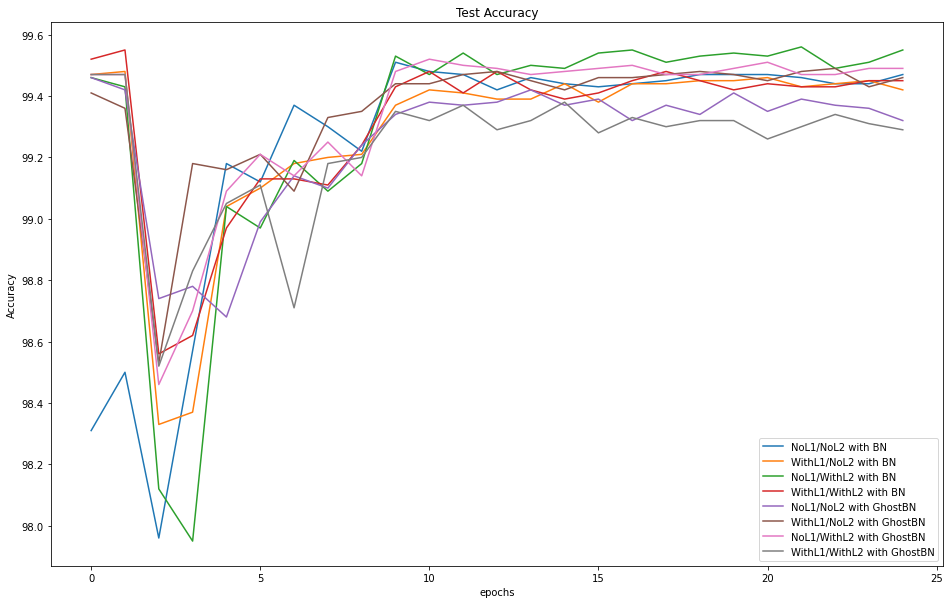

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,10))
plt.axes(xlabel= 'epochs', ylabel= 'Accuracy')
i = 0
for i in range(0,200,25):
    plt.plot(t.test_acc[i:i+25])
plt.title('Test Accuracy')
plt.legend(['NoL1/NoL2 with BN',
         'WithL1/NoL2 with BN',
         'NoL1/WithL2 with BN',
         'WithL1/WithL2 with BN',
         'NoL1/NoL2 with GhostBN',
         'WithL1/NoL2 with GhostBN',
         'NoL1/WithL2 with GhostBN',
         'WithL1/WithL2 with GhostBN'])

In [19]:
list1 = ['NoL1_NoL2 with BN','WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_NoL2 with GhostBN','NoL1_WithL2 with GhostBN','WithL1_WithL2 with GhostBN']
i= 0
for l in list1:
    print('The min loss for', l, 'is: ', min(t.test_loss[i:i+25]))
    i+=25
print('The overall min loss is: ', min(t.test_loss), ' at index ', t.test_loss.index(min(t.test_loss)) )

The min loss for NoL1_NoL2 with BN is:  0.01542213807106018
The min loss for WithL1_NoL2 with BN is:  0.014967836999893189
The min loss for NoL1_WithL2 with BN is:  0.01652961962223053
The min loss for WithL1_WithL2 with BN is:  0.016734762382507325
The min loss for NoL1_NoL2 with GhostBN is:  0.017252405500411988
The min loss for WithL1_NoL2 with GhostBN is:  0.016186438083648683
The min loss for NoL1_WithL2 with GhostBN is:  0.016098494005203245
The min loss for WithL1_WithL2 with GhostBN is:  0.01692821764945984
The overall min loss is:  0.014967836999893189  at index  26


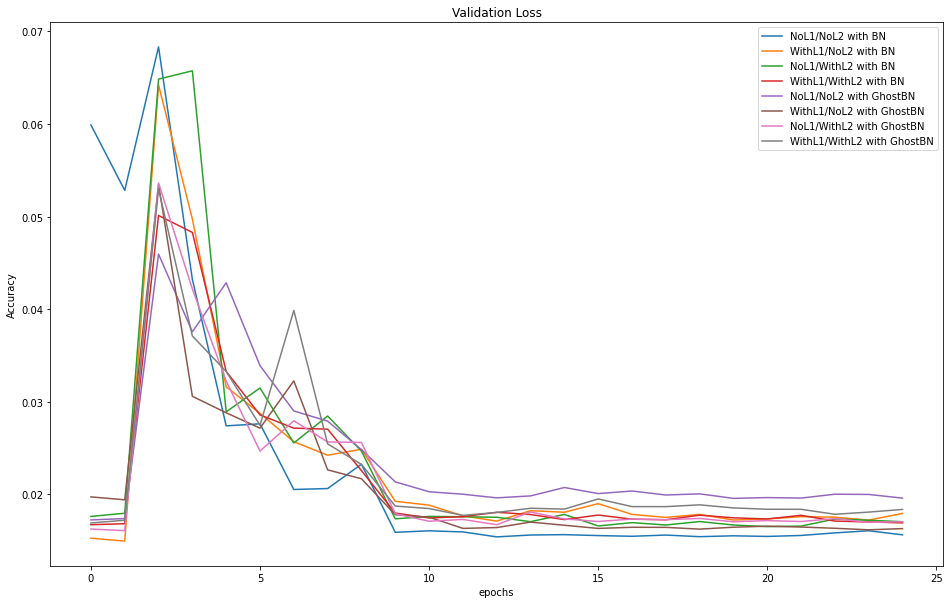

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,10))
plt.axes(xlabel= 'epochs', ylabel= 'Accuracy')
i = 0
for i in range(0,200,25):
    plt.plot(t.test_loss[i:i+25])
plt.title('Validation Loss')
plt.legend(['NoL1/NoL2 with BN',
         'WithL1/NoL2 with BN',
         'NoL1/WithL2 with BN',
         'WithL1/WithL2 with BN',
         'NoL1/NoL2 with GhostBN',
         'WithL1/NoL2 with GhostBN',
         'NoL1/WithL2 with GhostBN',
         'WithL1/WithL2 with GhostBN'])

In [21]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
list1 = ['NoL1_NoL2 with BN','WithL1_NoL2 with BN','NoL1_WithL2 with BN','WithL1_WithL2 with BN','NoL1_NoL2 with GhostBN','WithL1_NoL2 with GhostBN','NoL1_WithL2 with GhostBN','WithL1_WithL2 with GhostBN']
for i, l in enumerate(list1):
    path = 'savedmodel/'+l+' classifier.pt'
    if i<4:
        h = m.Net(gbn= False).to(device)
    else:
        h = m.Net(gbn= True).to(device)
    h.load_state_dict(torch.load(path))
    h.eval()
    t.test(h, device, test_loader, key=l)


Test set: Average loss: 0.0159, Accuracy: 9951/10000 (99.51%)


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)


Test set: Average loss: 0.0166, Accuracy: 9956/10000 (99.56%)


Test set: Average loss: 0.0175, Accuracy: 9948/10000 (99.48%)


Test set: Average loss: 0.0198, Accuracy: 9942/10000 (99.42%)


Test set: Average loss: 0.0164, Accuracy: 9949/10000 (99.49%)


Test set: Average loss: 0.0171, Accuracy: 9952/10000 (99.52%)


Test set: Average loss: 0.0184, Accuracy: 9938/10000 (99.38%)




Test set: Average loss: 0.0159, Accuracy: 9951/10000 (99.51%)


Test set: Average loss: 0.0198, Accuracy: 9942/10000 (99.42%)



<Figure size 432x288 with 0 Axes>

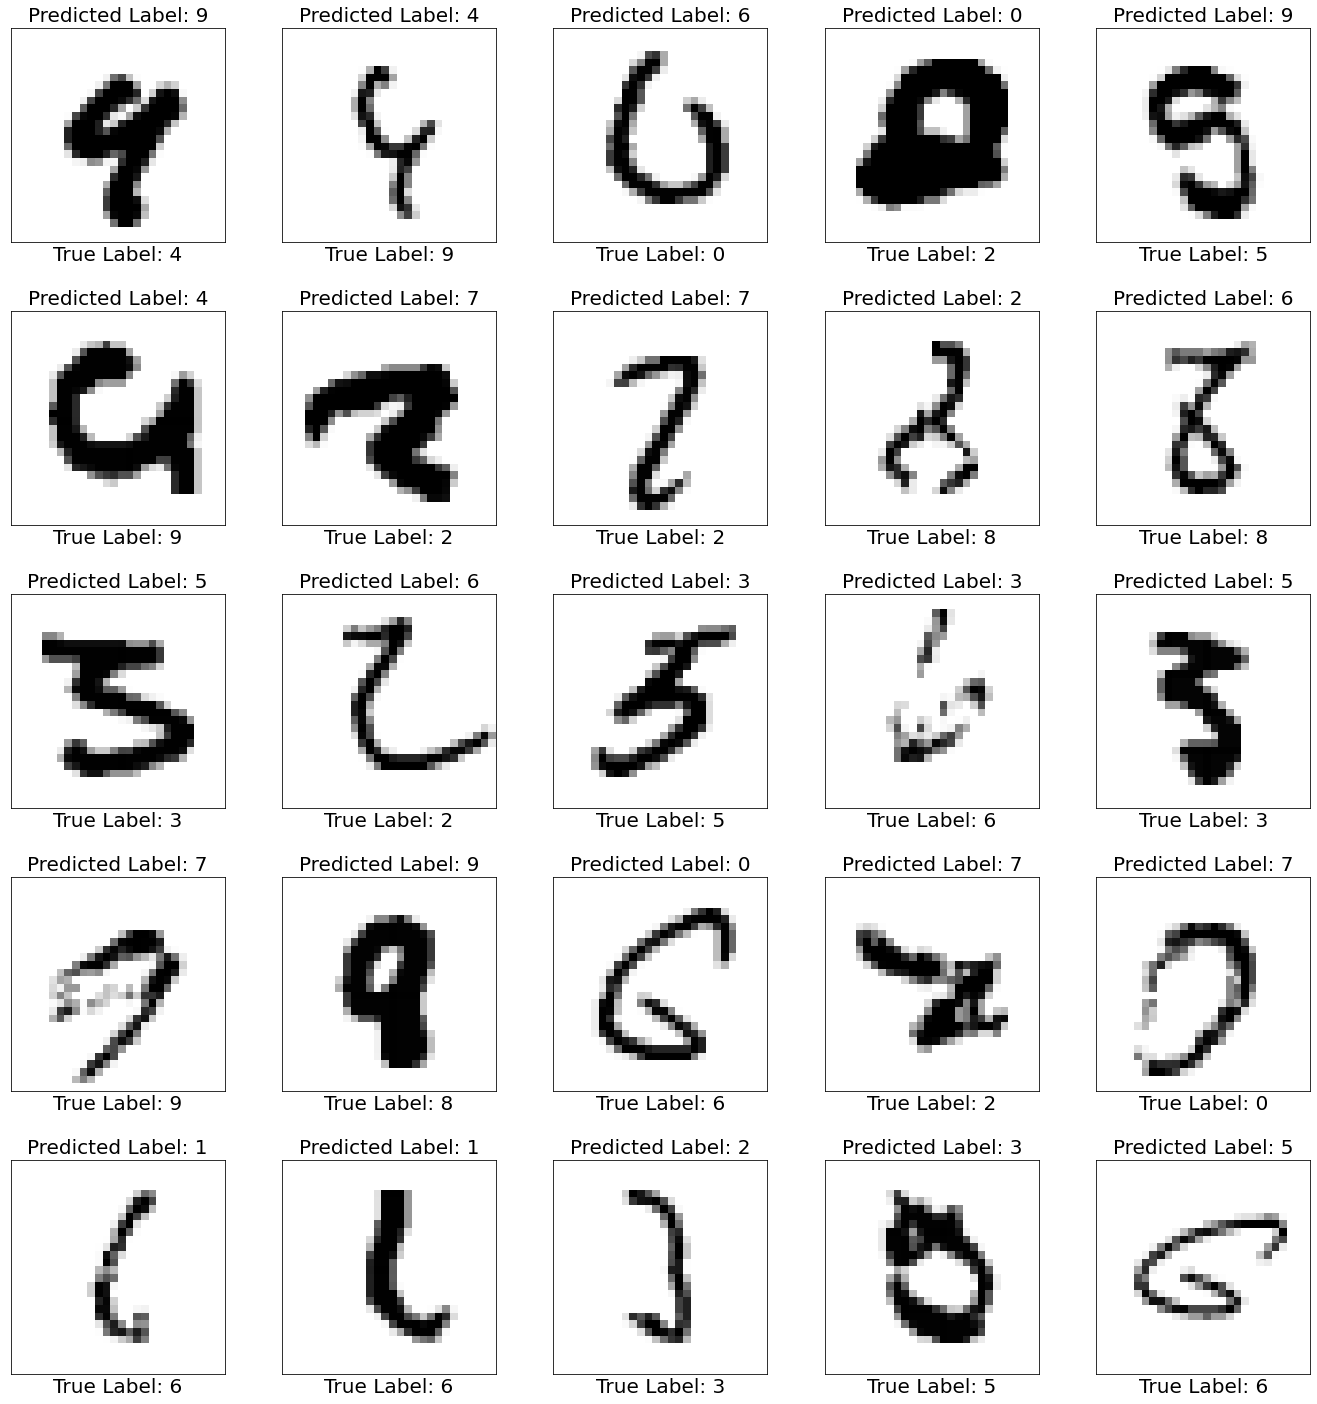

<Figure size 432x288 with 0 Axes>

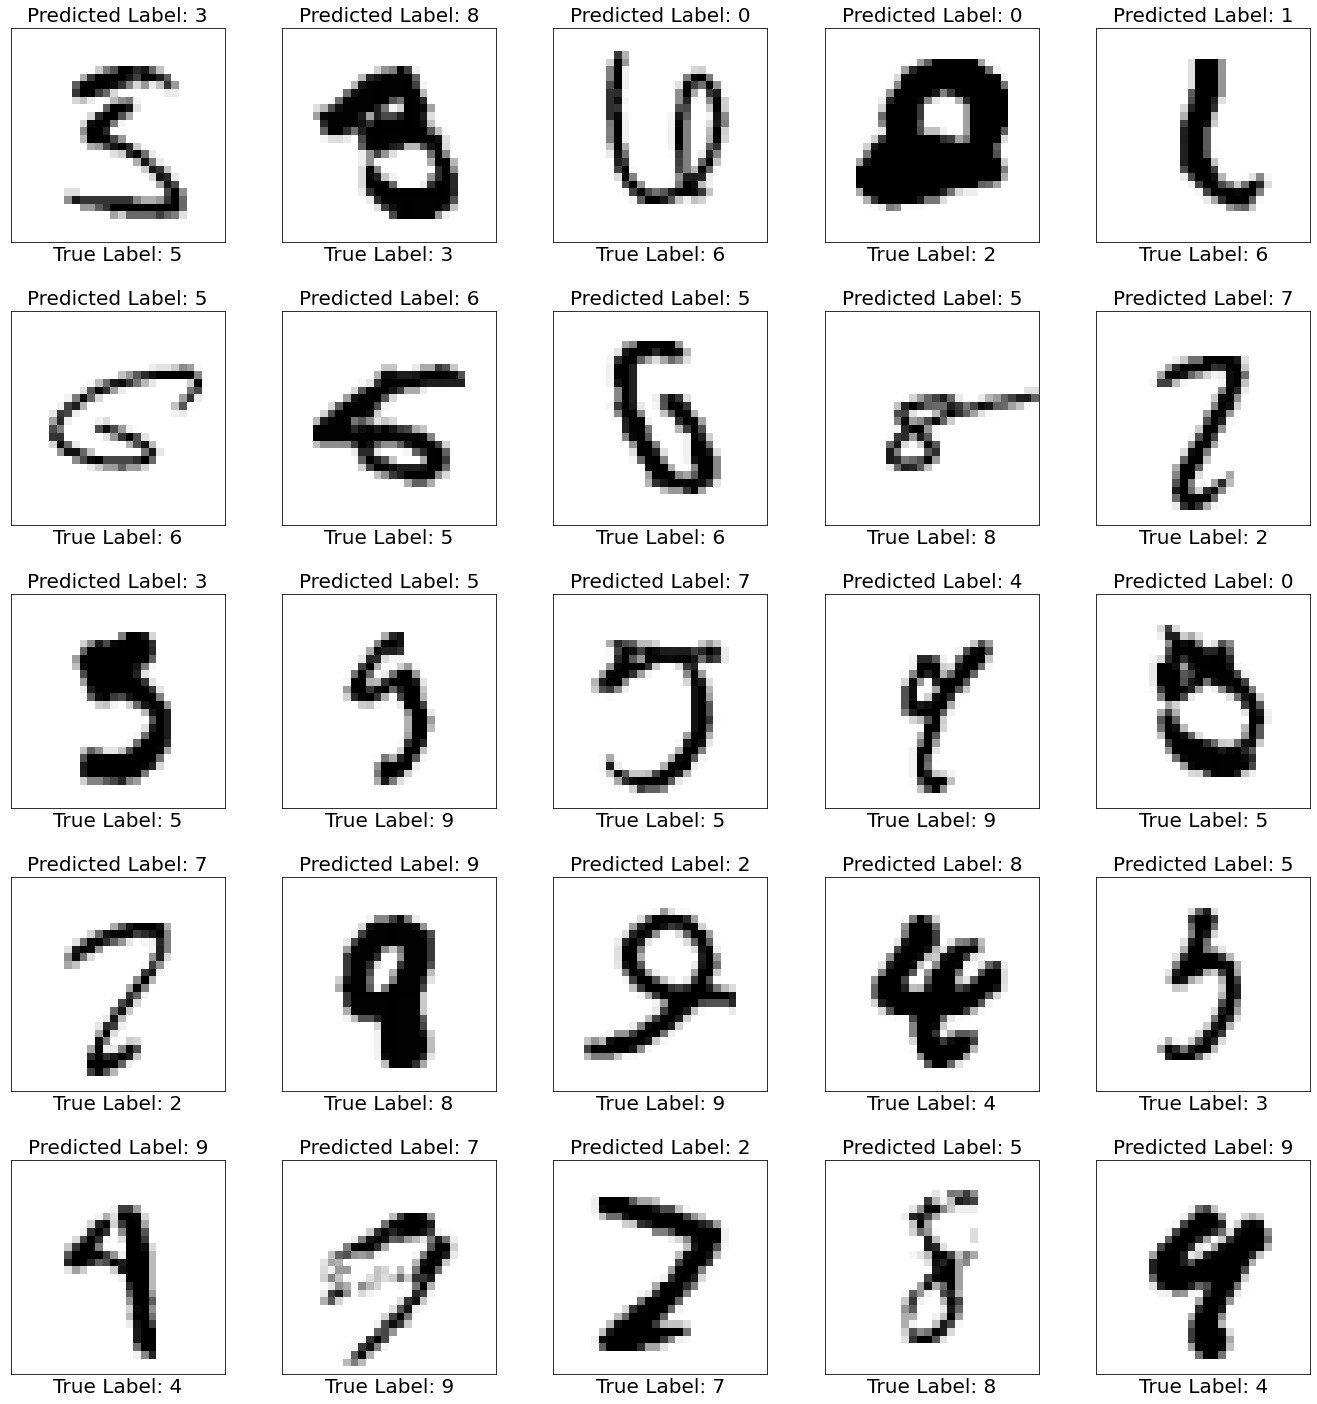

In [22]:
def mis():
  figure = plt.figure()
  num_of_images = 25
  plt.figure(figsize=(20,20))
  for index in range(0, num_of_images):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[index].cpu().numpy().squeeze(), cmap='gray_r')
    plt.title(f'Predicted Label: {plab[index]}', fontdict={'fontsize': 20})
    plt.xlabel(f'True Label: {tlab[index]}', fontdict={'fontsize':20})
    plt.tight_layout(pad= 2.5)

import test_misclass as tm
import matplotlib.pyplot as plt
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
list1 = ['NoL1_NoL2 with BN','NoL1_NoL2 with GhostBN']
for i, l in enumerate(list1):
    path = 'savedmodel/'+l+' classifier.pt'
    if i == 0:
        h = m.Net(gbn= False).to(device)
    else:
        h = m.Net(gbn= True).to(device)
    h.load_state_dict(torch.load(path))
    h.eval()
    tlab, plab, img = tm.test(h, device, test_loader)
    #print(tlab)
    mis()